<a href="https://colab.research.google.com/github/silviazandoli/explanaible_ai/blob/master/1_Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


**Chapter 3 - Intrinsic Explainable Models - Linear Regression and K-NN**

gianfagna_l_di_cecco_a_explainable_ai_with_python (Book)

## Linear Regression

In [4]:
wines = pd.read_csv('winequality-red.csv')
#to download here
#https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/code?datasetId=4458&sortBy=dateRun&tab=collaboration

In [5]:
wines

#no preelaborations needed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Inoltre, la classe DataFrame offre la possibilità di visualizzare graficamente la distribuzione dei valori delle feature sotto forma di istogrammi. Attraverso la visualizzazione grafica della distribuzione dei valori è possibile individuare tra le varie cose anomalie e la presenza di dati mancanti

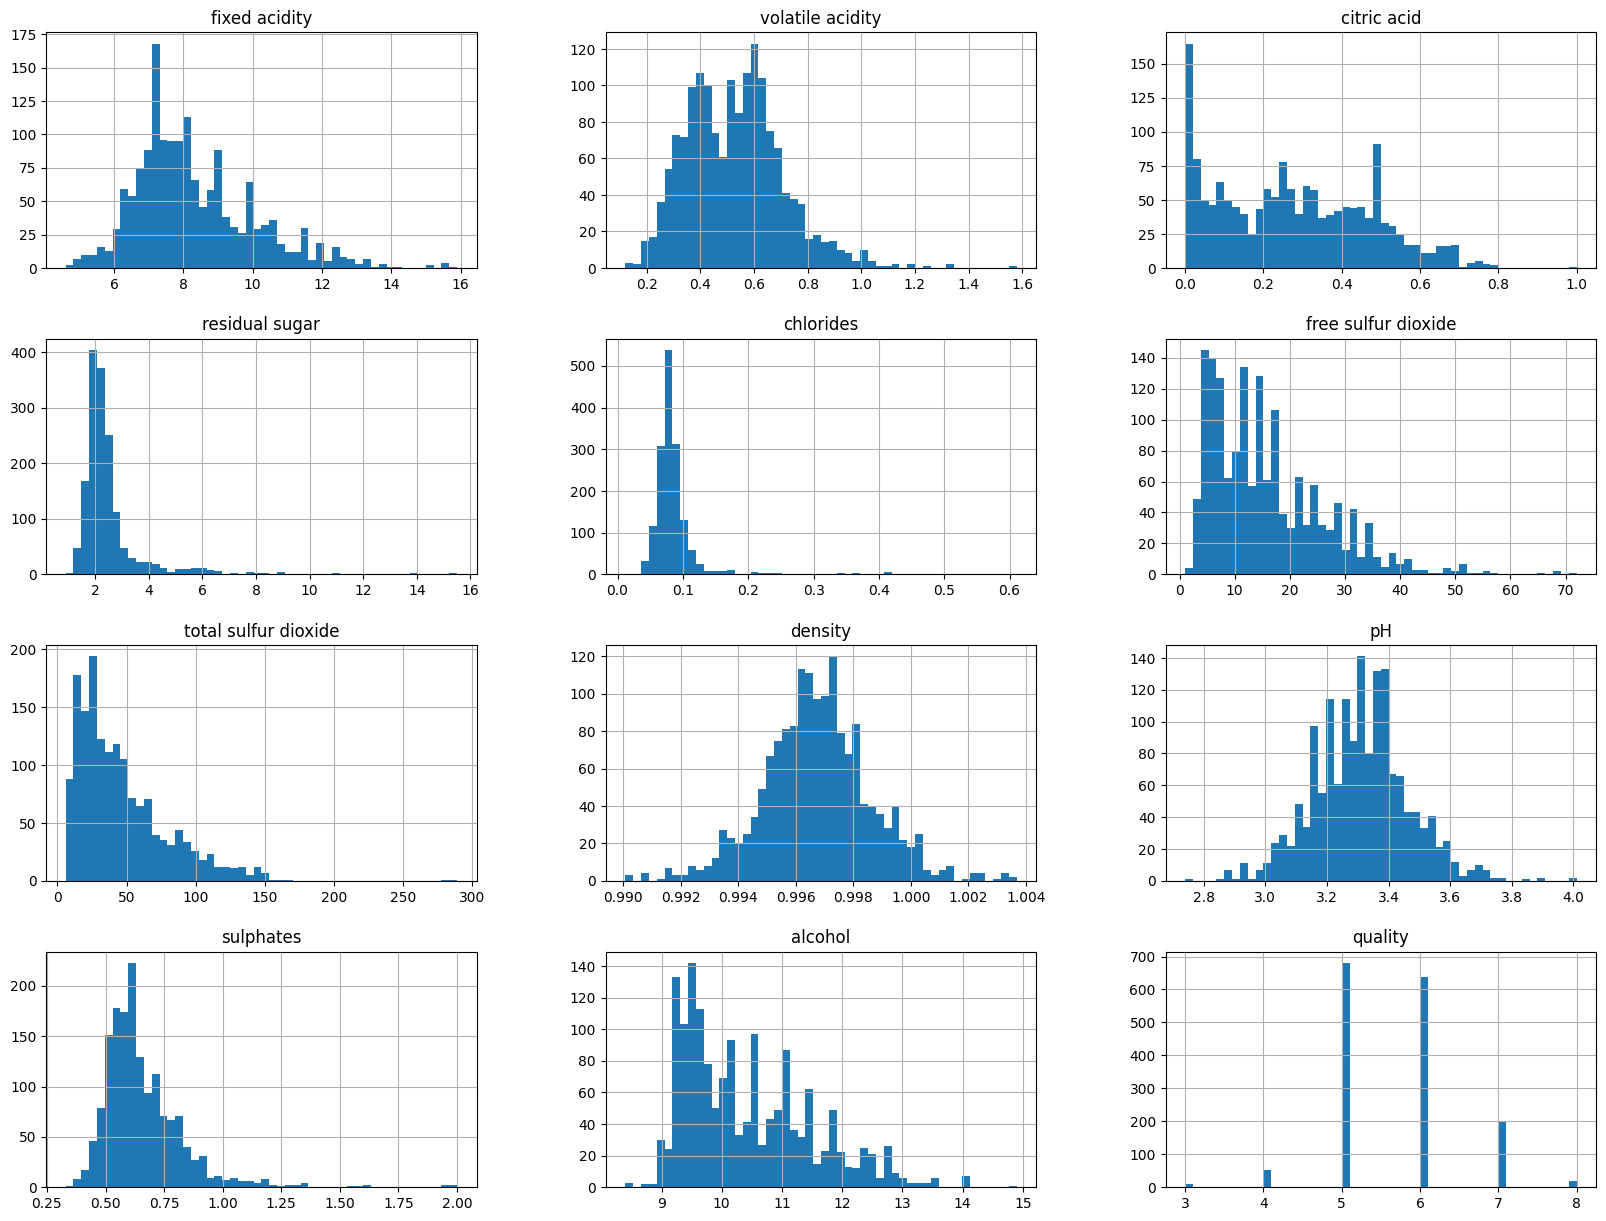

In [ ]:
# Visualizzazione grafica della distribuzione dei valori delle features (istogrammi)
wines.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
#11 features and 1 output (wine’s quality);
X=wines.iloc[:,:-1].values
Y=wines.iloc[:,-1].values
#It doesn't matter if the random_state is 0 or 1 or any other integer.
#What matters is that it should be set the same value, if you want to validate your processing over
#multiple runs of the code. By the way I have seen random_state=42 used in many official examples of scikit
# as well as elsewhere also.
#random_state as the name suggests, is used for initializing the internal random number generator,
#which will decide the splitting of data into train and test indices in your case.
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=3) #A
regressor = LinearRegression()
regressor.fit(x_train, y_train) #B

coefficients=pd.DataFrame(regressor.coef_)
coefficients.columns=['Coefficient']
#A usual splitting of data between train and test
#B Fitting to produce the coefficients

print(coefficients.sort_values(by='Coefficient',ascending=False))



    Coefficient
9      0.823603
10     0.294181
0      0.023274
3      0.008119
5      0.005500
6     -0.003542
2     -0.141268
8     -0.406325
1     -0.991536
4     -1.591924
7     -6.069166


**Sorted coefficients of the linear regression**

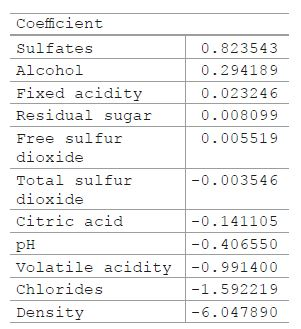

We see the ones that are negatively correlated with quality with a minus sign and
the ones that positively impact the quality with a plus sign. The top three contributors
are the negative values density, chlorides, and volatile acidity, while the top
three positive ones are sulfates, alcohol, and fixed acidity. **So, without relying on
complex tools or artifacts, we have shown how we can make sense of a linear regression
in terms of getting explanations about how the prediction about quality is
produced.**
With minimum effort and amount of code, you as the data scientist are already in
the position of providing feedback to the wine producer.

Durante la prima analisi dei dati può essere utile individuare eventuali correlazioni tra le diverse feature. È possibile utilizzare il metodo .corr() per calcolare i coefficienti di correlazione. Nella cella seguente verranno stampati a video i coefficienti relativi alla correlazione tra le diverse feature rispetto all'etichetta "quality" per esempio.

In [ ]:
#correlation with our target quality
corr_matrix = wines.corr()['quality'].drop('quality')
#print(corr_matrix.sort_values(ascending = False))
#migliore stampa
corr_matrix.iloc[ (-corr_matrix.abs()).argsort()]

alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
Name: quality, dtype: float64

Osservando i valori ottenuti si nota come volatile acidity e alcohol sono le features più correlate con la qualità (una negativamente e l'altra positivamente) .
Ricordando la differenza tra causa e correlazione alcohol e volatile acidity non sono le cause maggiori della qualità. Ma, a seconda di questo esempio lineare, esse sono le due features che meglio **spiegano** i cambiamenti in qualità.

Disegniamo una heatmap

Osserveremo che la alcohol è la feature più importante per migliorare la qualità (0.48)

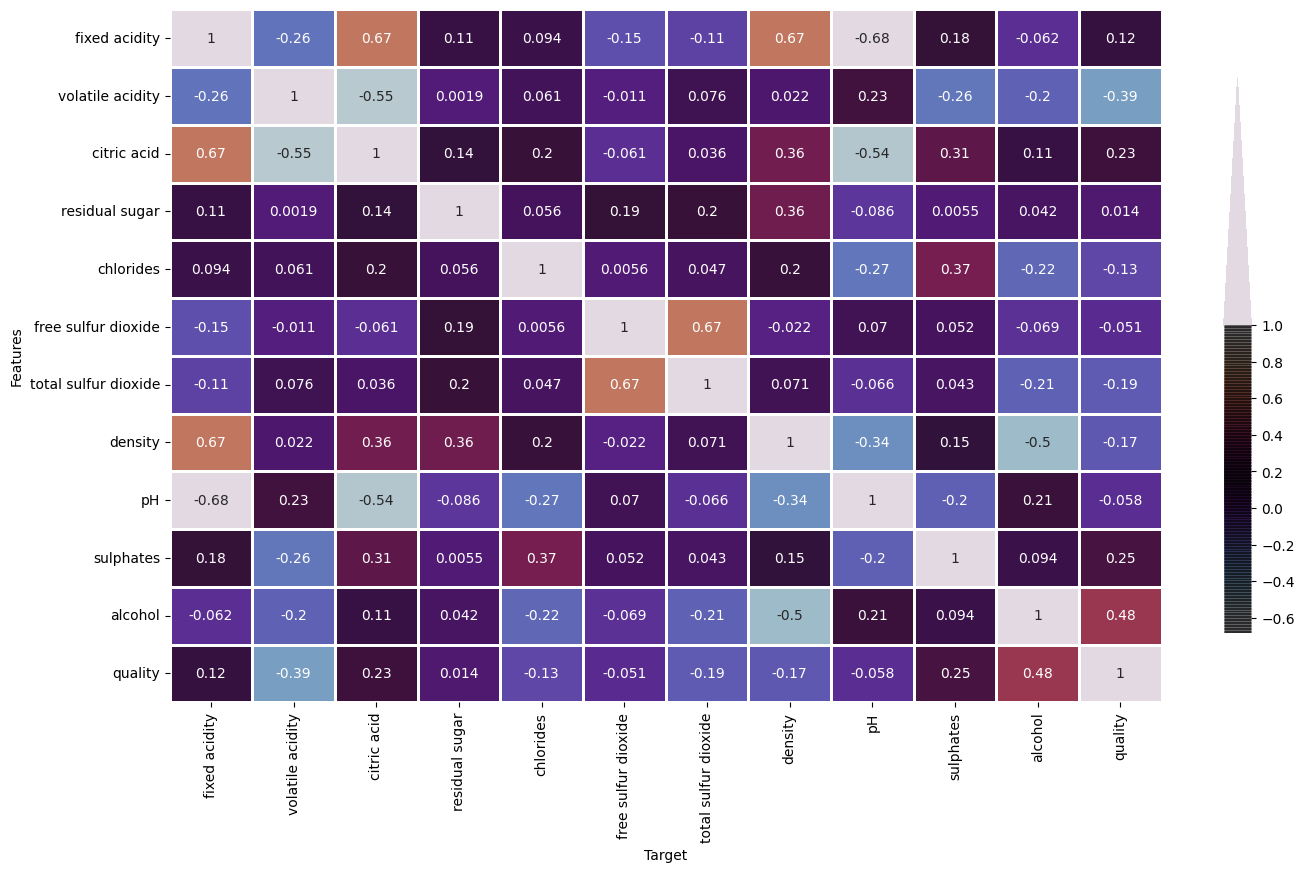

In [ ]:
import seaborn as sns
# set heatmap size
plt.figure(figsize= (16,9))

cbar_kws = {"shrink":.8,
           'extend':'max',
           'extendfrac':.8,
           "drawedges":True}

sns.heatmap(wines.corr(), cmap="twilight", annot = True, linewidth = .9, cbar_kws=cbar_kws)
plt.xlabel("Target", fontsize = 10)
plt.ylabel("Features", fontsize = 10)
plt.show()

First explanations : our model produced a prediction that alcohol is strongly coupled with
quality; changing alcohol level improves quality.

Lasso regularization per eliminare le features meno significanti.
Ad esempio il valore di densità ha il valore del peso più grande ma un coefficiente di correlazione molto piccolo.

In [ ]:
#We standardize the features to unit variance and train a Lasso model with different alpha
from sklearn.preprocessing import StandardScaler
x_train_scaled = StandardScaler().fit_transform(x_train)
# scaling features
from sklearn import linear_model
regressor = linear_model.Lasso(alpha=0.045)
# selecting a Lasso regressor model
regressor.fit(x_train_scaled,y_train)
# training the Lasso regressor
coefficients=pd.DataFrame(regressor.coef_)
coefficients.columns=['Coefficient']
print(coefficients.iloc[ (-coefficients.Coefficient.abs()).
argsort()])

    Coefficient
10     0.292478
1     -0.170318
9      0.079738
6     -0.036544
0      0.020537
4     -0.002670
2      0.000000
3      0.000000
5      0.000000
7     -0.000000
8     -0.000000


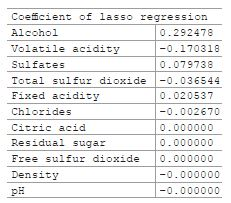



For example with a choice of alpha = 0.045, we find and show what are the first
six features by importance, and in fact “density” has been found as one of the less
relevant features.

Recap:

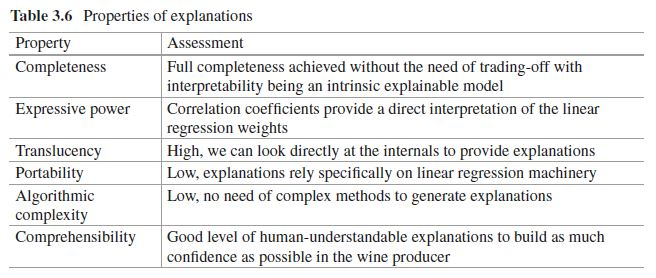


## K-NN (K-Nearest Neighbors)

In [15]:
X = wines.iloc[:, 1:13].values
y = wines.iloc[:, 0].values
#convert training scores with label encoding

from sklearn import preprocessing
from sklearn import utils

#label encoding on y values
lab_enc = preprocessing.LabelEncoder()
encoded_y = lab_enc.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size = 0.10)
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=15, metric="euclidean")
trained_model=classifier.fit(X_train[:,0:2],y_train)

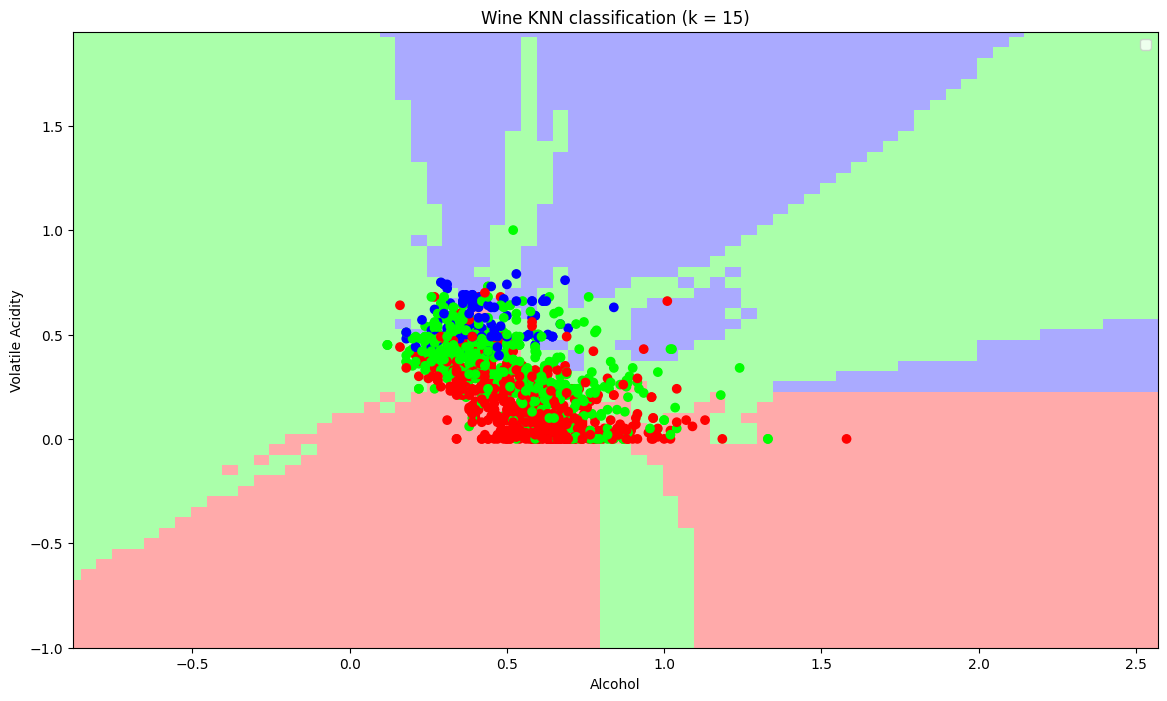

In [21]:
#We draw the boundaries using a mesh grid. For each node in the grid, the model predicts the corresponding class
from matplotlib.colors import ListedColormap

X=X_train
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold= ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h=0.05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
Z = trained_model.predict(np.c_[xx.ravel(), yy.ravel()])
kk=np.c_[xx.ravel(), yy.ravel()]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(14, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title("Wine KNN classification (k = 15)")
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.show()

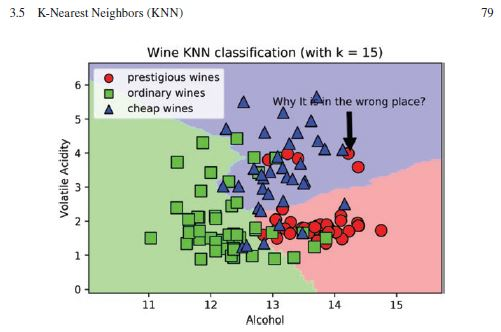

Recap:

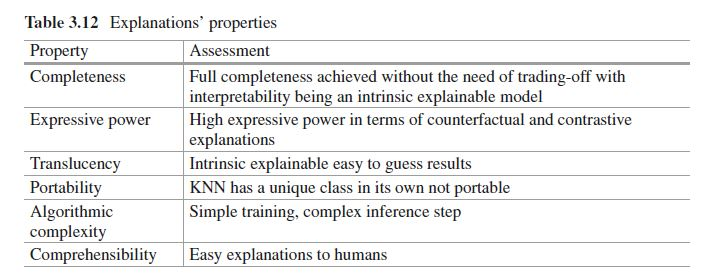